In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 22
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
from scipy.optimize import linprog

$p_{i} = \sigma_{i}(\pi \epsilon_{i} + \mu_{i})$

In [2]:
def index(pi=2, sigma=1, mu=0.5, epsilon=1): 
    index = sigma*(pi*epsilon+mu)
    return index

def plot_index_pi(function): 
    t1 = np.arange(0.0, 5.0, 0.2)
    plt.figure(figsize=(10,10))
    plt.plot(t1, function(pi=t1), 'o--', label='$\sigma_i$ = 1', color='black', markersize=10)
    plt.plot(t1, function(pi=t1, sigma=2), '+--', label='$\sigma_i$ = 2', color='black', markersize=10)
    plt.plot(t1, function(pi=t1, sigma=3), '<--', label='$\sigma_i$ = 3', color='black', markersize=10)
    plt.plot(t1, function(pi=t1, sigma=4), '*--', label='$\sigma_i$ = 4', color='black', markersize=10)
    plt.xlabel('$\pi_i$')
    plt.ylabel('$p_i$')
    plt.legend()
    plt.show()
    
    
def plot_index_mu(function): 
    plt.figure(figsize=(10,10))
    t1 = np.arange(0.0, 6/7, 0.04)
    plt.plot(t1, function(mu=t1), 'o--', label='$\sigma_i$ = 1', color='black', markersize=10)
    plt.plot(t1, function(mu=t1, sigma=2), '+--', label='$\sigma_i$ = 2', color='black',markersize=10)
    plt.plot(t1, function(mu=t1, sigma=3), '<--', label='$\sigma_i$ = 3', color='black',markersize=10)
    plt.plot(t1, function(mu=t1, sigma=4), '*--', label='$\sigma_i$ = 4', color='black',markersize=10)
    plt.xlabel('$\mu_i$')
    plt.ylabel('$p_i$')
    plt.ylim(0,20)
    plt.legend()
    plt.show()

In [3]:
def tennis_model(alpha1 = 0.7, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.15, gamma = 0.8, nu = 0.9, beta = 1.7):
    obj = [-1, 0, 0, 0, 0, 0, 0, 0]
    lhs_ineq = [[alpha1,  0, 0, 0, 0, 0, 0, -1],  # (2)
                [-alpha2,  0, 0, 0, 0, 0, 0, 1], 
               [0,  0, 0, 0, 0, 0, 0, -1], 
               [0,  0, 0, 0, 0, 0, 0, 1], 
               [gamma,  -1, 0, 0, 0, 0, 0, 0], 
               [0, gamma,  -1, 0, 0, 0, 0, 0], 
               [0, 0, gamma,  -1, 0, 0, 0, 0],
               [0, 0, 0, gamma,  -1, 0, 0, 0], 
               [0, 0, 0, 0, gamma,  -1, 0, 0], 
               [0, 0, 0, 0, 0, gamma,  -1, 0], 
               [-nu,  1, 0, 0, 0, 0, 0, 0], 
               [0, -nu,  1, 0, 0, 0, 0, 0], 
               [0, 0, -nu,  1, 0, 0, 0, 0],
               [0, 0, 0, -nu,  1, 0, 0, 0], 
               [0, 0, 0, 0, -nu,  1, 0, 0], 
               [0, 0, 0, 0, 0, -nu,  1, 0], 
               [0, 0, 0, 0, 0, 0,  beta, -1], 
               [0, 0, 0, 0, 0, 0,  -2, 1]]  # Yellow constraint left side

    rhs_ineq = [0,  # Red constraint right side
                0, 
               -lambda1,
               lambda2, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0,
               0, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0]  # Yellow constraint right side

    lhs_eq = [[1, 1, 1, 1, 1, 1, 1, 1]]  # Green constraint left side
    rhs_eq = [1]       # Green constraint right side

    bnd = [(0, float("inf")),  # Bounds of x
            (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf"))]  # Bounds of y
    
    opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
    )

    print(opt.x)
    plt.figure(figsize=(10,10))
    x = [i for i in range(1,9)]
    y = opt.x
    plt.plot(x, pd.DataFrame(y, columns=['prize per round'])['prize per round'].cumsum(), 'x-.', color='black', label='set 1')
    plt.ylim(0,1)
    plt.xlabel('$k$')
    plt.legend()
    plt.show()
    
    return opt.x

[0.20734036 0.16587229 0.13269783 0.10615826 0.08959151 0.08063236
 0.07256913 0.14513825]


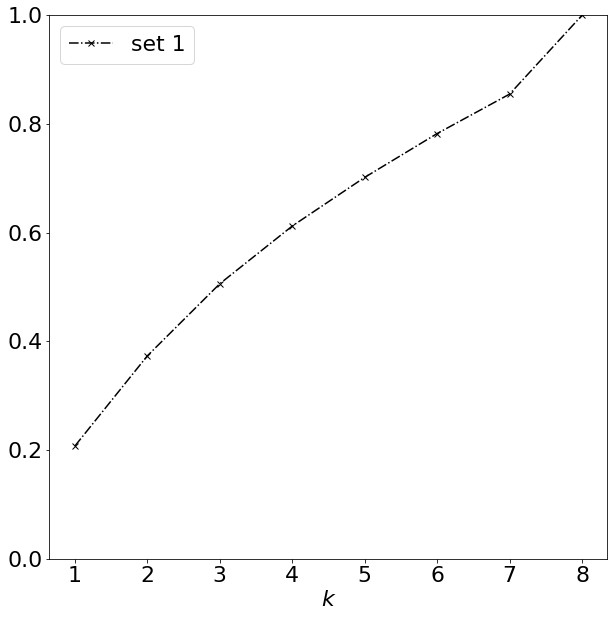

In [4]:
sol = tennis_model(alpha1 = 0.7, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.25, gamma = 0.8, nu = 0.9, beta = 1.7)